# Introduction to Machine Learning and the Basics of Regression
--------------
```
Authors: Will Raymond, Zachary Fox, Brian Munsky
```
<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>


Package imports

In [1]:
# # New packages that we are going to use in this notebook.
# # Uncomment the following lines to install the packages.
#
# %pip install numpy==1.25
# # This downgrades numpy to version 1.25.0, which is compatible with the current version of torch as of 02/23/2025. If you
# # have a newer version of numpy installed, you may encounter errors when using torch. After downgrading numpy, you may need
# # to restart the kernel to apply the changes.  You may also need to reinstall other packages that depend on numpy (such as
# # scikit-learn).
#
# # New packages:
# %pip install torch
# %pip install scikit-learn
# %pip install tdqm
# # These may take a few minutes to install.

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# **Learning Objectives**

Upon completion of this lesson, you should be able to:
* Describe the **what** are **Regression**,  **Classification**, and **Machine Learning**. 
* Describe **when**/**why** to use these approaches.
* Describe the theory behind **Linear Regression**
* Write your own codes to perform a **Linear Regression**
* Correct for **Bias** in a linear regression model
* Perform **Regularization** for linear regression
* Extend linear regression to **Polynomial Regression**
* Find and utlize a modern machine learning tools for regression, including **Neural Networks**, **Random Forests**, and **Bayesian Regression**.

Some relevant books (with available PDFs):
* [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), Christopher Bishop

* [Probabilistic Machine Learning](https://probml.github.io/pml-book/book1.html), Kevin Patrick Murphy

* [Data Modeling for the Sciences: Applications, Basics, Computations](https://www.amazon.com/Data-Modeling-Sciences-Applications-Computations/dp/1009098500/ref=sr_1_1?crid=3ACTTNI3IZ2SA&keywords=Steve+Presse+book&qid=1685627119&sprefix=steve+presse+boo%2Caps%2C317&sr=8-1), Steve Pressé and Ioannis Sgouralis.

# **1. Machine Learning Overview**

In this notebook and lecture, we are going to look at some supervised machine learning basics. Let's start off with a definition:

Machine learning (ML) is a class of mathematics and algorithms that learn an arbitrary model (denoted as $\mathcal{M}$) from sample data (denoted as $\bar{X}$) in order to make some predicitons or decisions (denoted as $\bar{Y}$). ML models are usually found by minimizing a given loss function ($L$), which in many cases is related to maximizing some likelihood function. 

Sample data can be provided with or without explanatory labels, and the model to be learned is not explicitly programmed, hence the name "Machine Learning." Broadly, ML falls under the umbrella of Artificial Intelligence, although that field has other disciplines besides ML. 


<p align="center">  <img src="FiguresD/image.png"> </p>

In biomedical engineering, machine learning techniques are applied to analyze and interpret large datasets of biological and medical information, such as genetic data, medical images, or clinical records, to discover patterns, identify relationships, and assist in diagnosis, prognosis, and treatment planning.

There are lots of different types of Machine Learning, each with its own strengths and limitations.  We will only cover a few in this course, but I hope that you will explore more on your own.

## **1.A. What are ML models?**

<p align="center">   <img src="FiguresD/image1.png"> </p>

### **1.A.1. The cannonical machine learning equation (X -> M -> Y)**

In much of machine learning, we are faced with the challenge to  approximate some relationship:
$$\mathbf{X} \rightarrow \mathcal{M} \rightarrow \mathbf{Y}, $$
but you might wonder, what are these quantities $\mathbf{X}$, $\mathcal{M}$, and $\mathbf{Y}$?  That is a great question, because the real power of machine learning is that all three of these terms can mean a very large number of very different things for different problems, and yet the concepts and approaches to solve this problem can remain similar.  Let's define each in very general terms.

<p align="center">   <img src="FiguresD/images.001.png"> </p>

## **1.B. "Input Features" ($\mathbf{X}$)**.

The matrix $\bar{X}_i$ is your **input feature data**; this is a collection of data that you can obtain to quantify each particular $i^{\rm th}$ sample, event or experiment. This can take many shapes, forms and sizes. One of the most common is an unordered vector of some arbitrary features. For example, one could imagine a classifier algorithm that takes inputs about a patient's currenty symptoms and demographics (perhaps we want to predict a probability that this patient has diabetes or another disease). That input data may be formatted as such:

$$
  \bar{X} = [ \text{Int : Age}, \text{Int : Urinations per day},  \text{Float : Liters drank per day}, \text{Bool : Peripheral Numbness}]
$$

An example entry for the $i^{\rm th}$ patient may be:
$$\bar{X}_i = [ 27, 6, 1.5, True ]$$

When we have data on a large number of different samples, we typically order these features into a matrix with one row for each sample:

$$\mathbf{X} =\left[ \begin{matrix} \bar{X}_0 \\ \bar{X}_1 \\ \vdots \\ \bar{X}_{N-1} \end{matrix}\right]$$

Ordered datasets can come in many shapes ranging from something like text (1xN vector where sequence is important) to full 3D color movies (XYZ coordinates by Color channel by number of frames). All of these can be represented by an arbitrary tensor of the correct shape by number of entries in your dataset.

$$
Shape(\mathbf{X}) = Nsamples \times Dim_1 \times Dim_2 ... Dim_N
$$
**The first step in any machine learning problem is always to look at the data**, so let's do that.


![alt text](FiguresD/images.006.png)

### **1.B.1. Python example of input matrix for diabetes data set.**

In [3]:
# Example of some input feature data for the diabetes dataset.
diabetes = datasets.load_diabetes()
dataDiabetes = diabetes.data

# Note the following features in the diabetes dataset:
    # age - age in years
    # sex - male or female
    # bmi - body mass index
    # bp - average blood pressure
    # s1 - TC: total serum cholesterol
    # s2 - LDL: low-density lipoproteins
    # s3 - HDL: high-density lipoproteins
    # s4 - TCH: total cholesterol / HDL
    # s5 - LTG: possibly log of serum triglycerides level
    # s6 - GLU: blood sugar level

# Let's update the data labels to be more descriptive.
diabetes.feature_names[4] = 'TC' # Total cholesterol
diabetes.feature_names[5] = 'LDL' # Low-density lipoproteins
diabetes.feature_names[6] = 'HDL' # High-density lipoproteins
diabetes.feature_names[7] = 'TCH' # Total cholesterol / HDL
diabetes.feature_names[8] = 'LTG' # Log of serum triglycerides level
diabetes.feature_names[9] = 'GLU' # Blood sugar level

print(f'The various features in the diabetes data base are: {diabetes.feature_names}')
print(f'The shape of the input matrix is {dataDiabetes.shape}')


The various features in the diabetes data base are: ['age', 'sex', 'bmi', 'bp', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
The shape of the input matrix is (442, 10)


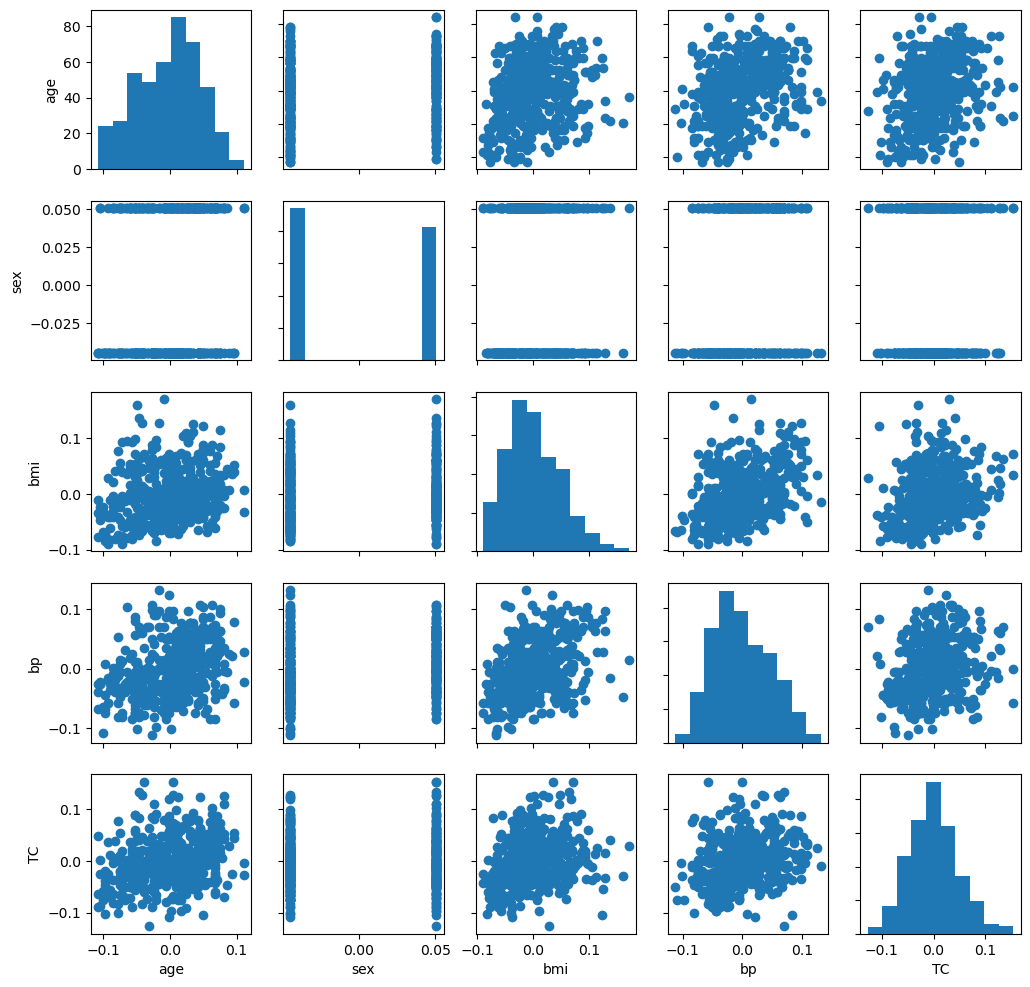

In [4]:
# Let's plot the data to see how it looks like.
# We are going to plot a matrix of scatter plots to see how the data looks like.
# We are going to use the first 5 features in the diabetes dataset.
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
for i in range(5):
    for j in range(5):
        if i==j:
            ax[i, j].hist(dataDiabetes[:, i])
        else:
            ax[i, j].scatter(dataDiabetes[:, j], dataDiabetes[:, i])
        if j==0:
            ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
        if i==4:
            ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
plt.show()
# Note that the variables are all scaled somewhat arbitrarilly in this data set.
# Some are discrete (e.g., sex), some are continuous (e.g., age).



## **1.C. Target Labels ($\mathbf{Y}$)**

![alt text](FiguresD/images.002.png)

The vector or matrix $\bar{Y}_i$ is your **target data** or **label data**; this is the end result or classification that you are trying to obtain or predict to describe the sample, event, or experiment. This can too take many shapes, forms, and sizes, and it might not even exist at all.

If the above data has a corresponding label (e.g., a known fact such as a statement saying whether the entries in your data truly have diabetes), your dataset is said to be **labeled**, and you can use **Supervised** machine learning techniques. 

In other machine learning problems, $\bar{Y}_i$ may not be specified. In this case, when your dataset has an absence of labels, then any approaches are said to be **Unsupervised.**

For now, we will focus on supervised learning, and we will assume that $\bar{Y}_i$ is known.  

### **1.C.1. Python example of Target Vectors for Diabetes data set.**

The shape of the target data is (442,)
[151.  75. 141. 206. 135.]
The shape of the target data is (442,)
[1. 0. 1. 1. 0.]


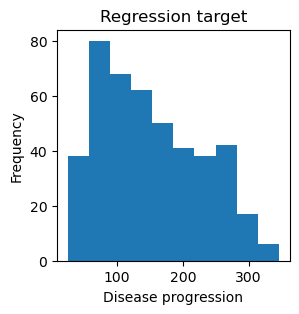

In [5]:
# Load the target data from the diabetes dataset.
# The target data is a quantitative measure of disease progression one year after baseline.
targetDiabetesRegression = diabetes.target
print(f'The shape of the target data is {targetDiabetesRegression.shape}')
print(targetDiabetesRegression[0:5])

# Let's also define a binary target variable for classification, where we 
# only need to classify the disease progression as high or low.
targetDiabClass = np.zeros(targetDiabetesRegression.shape)
targetDiabClass[targetDiabetesRegression > 140] = 1
print(f'The shape of the target data is {targetDiabClass.shape}')
print(targetDiabClass[0:5])

# Let's add the the target data to see how it looks like.
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(targetDiabetesRegression)
ax.set_title('Regression target')
ax.set_xlabel('Disease progression')
ax.set_ylabel('Frequency')
plt.show()

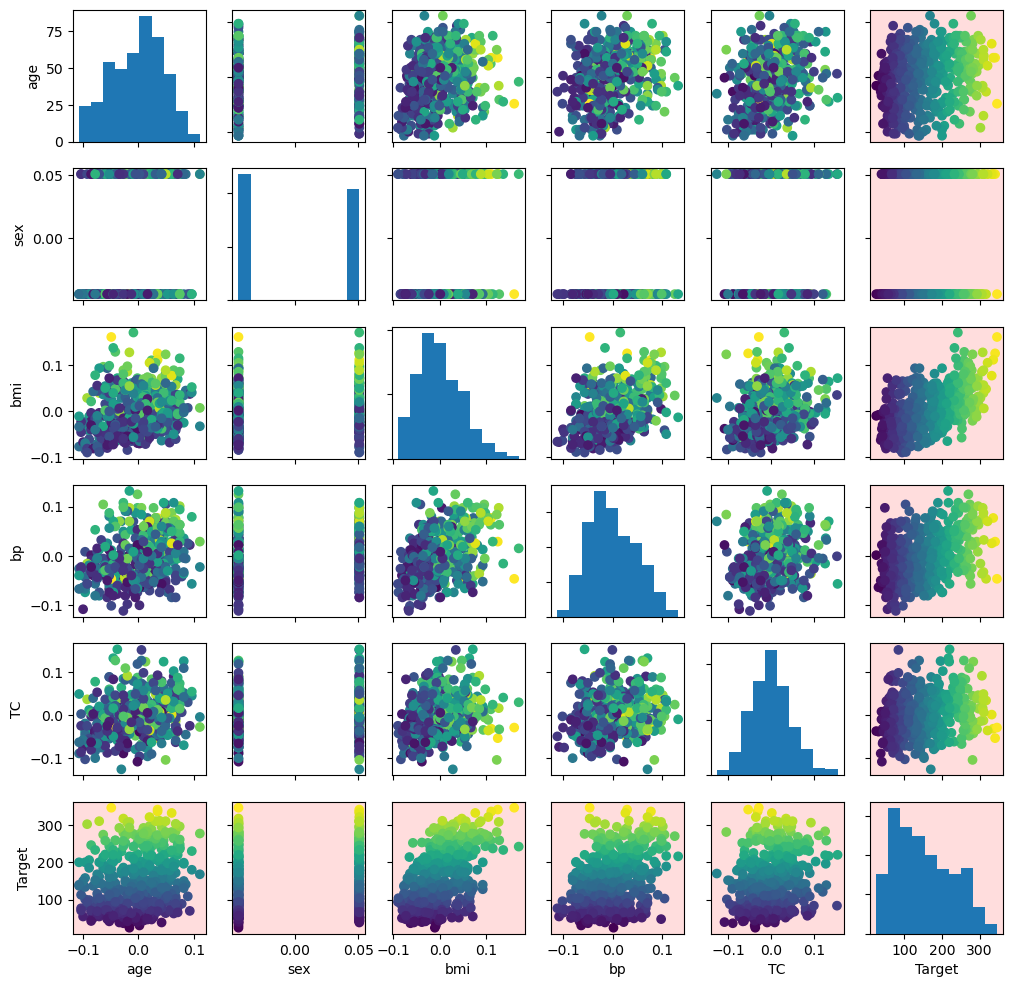

In [6]:
# Let's also replot our features against the target variable to see if we can see any patterns.
# For this, we are going to make a 6 x 6 matrix of scatter plots, with the features in the first 5 rows
# and the target variable in the last row.  We will also color the points according to the target variable.
fig, ax = plt.subplots(6, 6, figsize=(12, 12))
data_and_targets = np.hstack((dataDiabetes[:,:5], targetDiabetesRegression.reshape(-1, 1)))
for i in range(6):
    for j in range(6):
        if i==j:
            ax[i, j].hist(data_and_targets[:, i])
        else:
            ax[i, j].scatter(data_and_targets[:, j], data_and_targets[:, i], c=targetDiabetesRegression)
        if j==0:
            if i==5:
                ax[i, j].set_ylabel('Target')
            else:
                ax[i, j].set_ylabel(diabetes.feature_names[i])
        else:
            ax[i, j].set_ylabel('')
            ax[i, j].set_yticklabels([])
            if i==5:
                ax[i, j].set_facecolor('#FFDDDD')
        if i==5:
            ax[i, j].set_facecolor('#FFDDDD')
            if j==5:
                ax[i, j].set_xlabel('Target')
            else:
                ax[i, j].set_xlabel(diabetes.feature_names[j])
        else:
            ax[i, j].set_xlabel('')
            ax[i, j].set_xticklabels([])
            if j==5:
                ax[i, j].set_facecolor('#FFDDDD')

# Can you see any patterns in the data?  What do you think would be the best features to use for prediction?
# How would you turn code this inot a callable function for later use?
# How could you change the color scheme to make to use the binary target variable for a different visualization?


## **1.D. The Model ($\mathcal{M}$)**
![alt text](FiguresD/image5A.png)

$\mathcal{M}$ in our definition is any arbitrary set of mathematical or logical operations that takes $\bar{X}_i$ as an input and then makes a guess for a corresponding $\bar{Y}_i$. 

There are **tons** of different models and algorithms used for fitting data, and we will try a few over the next couple lessons, but this is **extremely** general, and statisticians and computer scientists are developing new models every day!

## **1.E. Types of Models: Regression and Classification**
The two most common machine learning modeling tasks are **Regression** and **Classification**.  The difference comes from what kinds of targets we are trying to predict. When targets ($\bar{Y}$) are defined in advance and they take on continuous values (e.g., 2.345), we call this a **Regression** problem. When the targets take on discrete values (e.g., \{0,1,2\} or \{true,false\}, or \{cat, horse, dog\}), we call this a **Classification** problem.



### **1.E.1 Regression Analysis**
![alt text](FiguresD/images.009.png)

When the desired output is a continuous valued, then we are training a model to perform a regression. An example problem would be taking a dataset of house features $\bar{X}$ and their current market prices $\bar{Y}$ and training a model to produce predicted prices for other houses, $\tilde{Y} =  \mathcal{M}(\tilde{X})$.

To evealuate how good is our model, we typically employ a **loss function**, which is simply a function that takes the real targets $\bar{Y}_i$ and the predicted targets $\tilde{Y}_i$ and quantifies their difference. 

An appropriate *loss function* for this situation may be the mean squared error (MSE) for your predicted prices and the true prices (we will why this choice in a little bit when we return to the concept of likelihood functions):

\begin{align}
MSE &= \frac{1}{N}\sum_{i=0}^{N-1} (\tilde{Y}_i - \bar{Y}_i)^2\\
 &= \frac{1}{N}\sum_{i=0}^{N-1} (\mathcal{M}(\tilde{X}_i) - \bar{Y}_i)^2\\
\end{align}

The goal is to find a the best possible $\mathcal{M}$ to minimize this loss function.

### **1.E.2. Classification**
![alt text](FiguresD/images.010.png)

When the desired output is a discrete valued, then we are training a model to perform a classification. An example problem would be taking a dataset of images $\bar{X}$ and their labels $\bar{Y}$ and training a model to produce predicted labels for other images, $\tilde{Y} =  \mathcal{M}(\tilde{X})$.

$\bar{Y}$ is our target for our ML model to learn. If our input data label $Y$ is a set of discrete or boolean labels, then we are setting up a model to solve a classification problem. For example, training a classifier to tell if a picture contains a cat or a dog, our dataset would look like $\bar{X}$ of shape $[N, X,Y, RGB]$ and $Y$ our labels would be shape $[N]$ with labels 0 for a cat or 1 for a dog (or vice versa). Comparing true labels $Y$ with predicted labels $\bar{Y}$ is our model's loss function:

\begin{equation}
  \bar{L} = F(Y, \bar{Y})
\end{equation}

An appropriate selection for **loss function ** in this classification problem would be binary cross entropy:

\begin{equation}
  -\frac{1}{N} \sum_{i=1}^N Y_i*\log(p(Y_i)) + (1-Y_i)*\log(1-p(Y_i))
\end{equation}

This is very closely related to the log likelihood function for a binomial distribution as we will see later.

## **1.F. What characteristics makes for a good model?**
Ideally, we want a model to be generalizable to new data. A good model acts as a map to its real world process. A good map doesn't show you every stone and blade of grass along the path, but instead the overarching **generalized** idea.

More generally, a good model in machine learning exhibits several key characteristics that contribute to its effectiveness in solving a given task. 
* **it should demonstrate high predictive accuracy**, meaning it can accurately generalize patterns from the training data to make accurate predictions on unseen data. 
* **it should be robust**, performing well across different datasets and under various conditions, indicating its ability to generalize beyond the training data. 
* **it should be interpretabile**, so stakeholders can understand and trust the model's decisions, especially in sensitive domains. 
* **it should be scalable** to handle large datasets efficiently and to accommodate potential increases in data volume. 
* **it should be computationally efficient,** striking a balance between complexity and performance to enable practical deployment in real-world applications.
* **it should be adaptable** to new data and evolving requirements, enabling iterative refinement and optimization to maintain its relevance and effectiveness over time.

Which of the six models below do you think would be considered a good model?
![alt text](FiguresD/images.015.png)

-----
# **2. Linear Regression**

![alt text](FiguresD/images.004.png)

## **2.A. Introduction to Linear Regression**

In **Linear Regression** we start with our with $D$ different measured features ($x_1,x_2,\ldots,x_D$), which _we assume_ are linearly related to the target variable ($y$). To express this mathematically, we define a function which multiplies each feature $x_i$ with a corresponding, unknown weight $w_i$, and add them all together:
$$
y = \mathcal{M}(\mathbf{x}) = w_0 x_0 + w_1 x_1 + ... + w_D x_D.
$$
We can write this using vector notation as:
$$
y = \mathbf{w}^{\rm T} \mathbf{x}.
$$

## **2.B. Linear equations using matrix multiplication**

When we have the multiple data sample sets of $\mathbf{x}$ and $y$, given by $\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),\ldots,(\mathbf{x}_N,y_N)\}$ we can construct a matrix, in which each row is defined by the corresponding $\mathbf{x}_k$.

$$
\mathbf{X}=\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_N^T
\end{bmatrix}
$$

We want to apply the _same weights_ $\mathbf{w}$ to each example and return a predicted value, $y_k$.  This can be achieved through a matrix multiplication:
$$
\mathbf{y} = \mathbf{w}^T \mathbf{X}^T = \mathbf{X}\mathbf{w}
$$

For **real models** and **real data**, this equality is never going to be exact.  Instead, we are going tohave to allow some variations to account for noise or errors in our measurements.

## **2.C. Loss Function for Linear Regression**

So how do we quantify how good is this linear model in comparision to real, noisy data?

For this, we want to define what is called the **loss function**, which is a fundamental concept in ML. The loss function is a function which:
   * when we take the derivative of it, this can be used to update the weights of the model.
   * compares the predicted values of our model to ground truth values (supervised learning) OR takes some metric of the predicted values (unsupervised learning).
    
Constructing the loss function is a **design choice**. How we choose it can drastically affect the quality of our ML model.

## **2.D. Likelihood Approach**

Whenever possible, most statisticians prefer to define loss functions in terms of **Likelihood Functions**, since we want our model to be as good as possible in explaining our data in a statistically rigorous sense.

Because we are engineers and quantitative biologists, let's assume that the our noisy measurements data are given by our beautiful linear function, plus some real-world noise term $\epsilon$,
$$
t_i \equiv y^{\rm (measured)}_i = y_i + \varepsilon = \mathbf{x}_i\mathbf{w} + \varepsilon_i
$$
where each $\varepsilon_i$ is an **independent** random number drawn from a Normal distribution with mean 0 and variance $\sigma^2$.

Therefore, we can write the likelihood function of the true value given the model prediction for any input $\mathbf{x}$:

$$
L(t_i | \mathbf{x}_i, \mathbf{w}, \sigma^2 ) = \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2)
$$

and for all of our *independent* samples as
$$
L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = \prod_{i=1}^N \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2)
$$

**Question:** What assumption did we make here?  When would using the above equation be a bad idea in practice?

### **2.D.1. Transforming to the Log-Likelihood**
When we have many data points, the probability to observe them all is going to be very small, even if we have an excelent model. Therefore, it is much more convenient for us to work with log-likelihood functions.
$$
\log L(\mathbf{t}| \mathbf{X}, \mathbf{w}, \sigma^2 ) = \sum_{i=1}^N \log \mathcal{N}(t_i|\mathbf{x}_i\mathbf{w},\sigma^2) =  \sum_{i=1}^N \log \left(\frac{1}{\sqrt{2\pi \sigma^2)}}\exp\left(\frac{(t_i-\mathbf{x}_i\mathbf{w})^2}{2\sigma^2}\right) \right)
$$
$$
\log L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) = - N \log \sigma^2 -  \frac{N}{2} \log 2 \pi - \frac{1}{2\sigma^2}  \sum_{i=1}^N \big( t_i-\mathbf{x}_i\mathbf{w} \big)^2
$$


### **2.D.2 Differentiating to find the Maximum Likelihood Estimate**
Our goal is to find the model weights that **maximize** this log-likelihood function.  And, as we have seen multiple times already, this is done by taking derivatives:
$$ \nabla_{\mathbf{w}}\log L(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2 ) =    \nabla_{\mathbf{w}}\left(  \frac{1}{2\sigma^2}  \sum_{i=1}^N \left( t_i-\mathbf{w}^T\mathbf{x}_i^T \right)^2\right)$$
$$=  \frac{1}{\sigma^2}  \sum_{i=1}^N \left(t_i-\mathbf{w}^T\mathbf{x}_i^T\right)\mathbf{x}_i.$$

Setting this to zero at the maximum likelihood estimate (MLE) and moving the $t_i$ terms to the other  side, we can derive:
$$  \sum_{i=1}^N \left(\mathbf{w}_{\rm MLE}^T\mathbf{x}_i^T\right)\mathbf{x}_i =  \sum_{i=1}^N  t_i\mathbf{x}_i$$

We can then simplify in matrix notation as:
$$\mathbf{w}_{\rm MLE}^T\mathbf{X}^T\mathbf{X} =   \mathbf{t}^T\mathbf{X}^T $$
and by taking the transpose of both sides:
$$ \mathbf{X}^T\mathbf{X} \mathbf{w}_{\rm MLE} =   \mathbf{X} ^T \mathbf{t}$$
which reduces to:
$$\mathbf{w}_{\rm MLE} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t} $$

In this last expression, the term $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$, which is often denoted as $\mathbf{X}^{+}$ is known as the *Moore-Penrose Pseudo-Inverse* of the matrix $\mathbf{X}$.  This is a generalization of the common matrix inverse ($\mathbf{X}^{-1})$, but the Moore-Penrose Pseudo-Inverse works for tall matrices (matrices with more rows than there are columns).  When $\mathbf{X}$ is invertible, then $\mathbf{X}^{+}=\mathbf{X}^{-1}$, but that will rarely be the case in a realistics regression problem where there will be far more rows than columns in the matrix $\mathbf{X}$.

So, after that hard work of maximum likelihood estimation, we arrived at a very intuitive result.  If we have a bunch of observations in the feature matrix $\mathbf{X}$ we can make the MLE predction for the noisy target vector $\mathbf{t} = \mathbf{y}^{\rm (measured)} = \mathbf{y}+\bf{\varepsilon}$ the equation:
$$\mathbf{t} = \mathbf{Xw}_{\rm MLE},$$
where the MLE weights are simply:
$$\mathbf{w} = \mathbf{X}^{+}\mathbf{t}.$$

Now, lets try a few examples.


# **3. Python Example for Linear Regression**

Now, let's use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) to try a linear regression:

## **3.A. Load the data**

In [7]:
# Load the input data and target data from the diabetes dataset.
dataMatrix, targetVector = datasets.load_diabetes(return_X_y=True)

# How can we compute the number of features and number of data points?
numSamples, numFeatures = dataMatrix.shape

print(f'The number of samples is {numSamples}')
print(f'The number of features is {numFeatures}')

The number of samples is 442
The number of features is 10


### **3.A.1 Split data into training and testing sets**

In [8]:
# Let's start by splitting the data into a training and testing set.
# We will use 80% of the data for training and 20% for testing.
# Partition the data into training and test sets, using random selection.
np.random.seed(0)
indices = np.random.permutation(numSamples)
splitIndex = int(numSamples*0.8)
training_inds, test_inds = indices[:splitIndex], indices[splitIndex:]
trainingData, testData = dataMatrix[training_inds,:], dataMatrix[test_inds,:]
trainingTarget, testTarget = targetVector[training_inds], targetVector[test_inds]

## **3.B. Fit the linear regression model**

In [ ]:
# Now, let's find the weights according to our derived expression
# (X^T X)^-1 X^T y
# where X is the training data and y is the training target.
weights = np.linalg.inv(trainingData.T @ trainingData) @ trainingData.T @ trainingTarget

## **3.C. Predict the test data**

In [10]:
# Use the weights to predict the target data.
predTargetCustom = testData @ weights


### **3.C.1 Plot the predictions for test data**

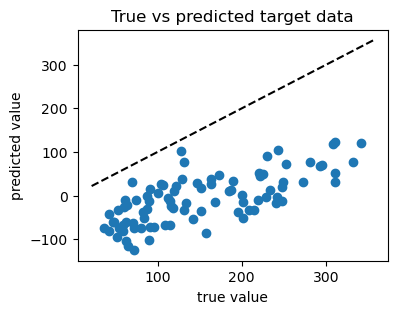

In [11]:
# Plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, predTargetCustom)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

### **3.C.2 Evaluate the model using the R^2 score**

The R^2 score, also known as the **coefficient of determination**, is a measure of how well the observed outcomes are replicated by the model.  It is a number less than or equal to 1, with 1 indicating perfect fit. 

In [12]:
# Let's compute the R^2 score to quantify the fit.
r2_LinReg = r2_score(testTarget, predTargetCustom)
print(f'The R^2 score is {r2_LinReg}')
# Yuck, negative values can indicate that the model is worse than just using the mean of the target data!

The R^2 score is -3.202930288790344


## **3.D. Account for model bias and overfitting**

### **3.D.1. Add constant term to account for bias**

In [14]:
# Let's see if we can do better by adding a bias term to the model.
# We can add a bias term by adding a column of ones to the input data matrix.
# This is equivalent to adding a constant to the input data.
X_biasTrain = np.hstack((trainingData, np.ones((trainingData.shape[0], 1))))
X_biasTest = np.hstack((testData, np.ones((testData.shape[0], 1))))

# find the weights according to our derived expression
w_bias = np.linalg.inv(X_biasTrain.T @ X_biasTrain) @ X_biasTrain.T @ trainingTarget
y_biasPredict = X_biasTest @ w_bias

In [15]:
w_bias[-1]

151.75765127036337

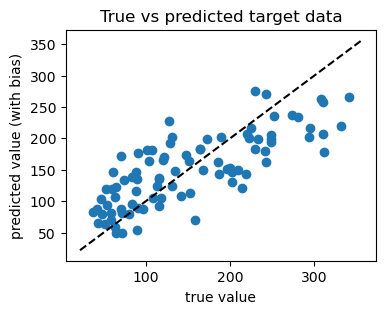

The R^2 score is 0.5950404994347135


In [16]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value (with bias)')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_LinRegBias = r2_score(testTarget, y_biasPredict)
print(f'The R^2 score is {r2_LinRegBias}')

# That's better!  The R^2 score is now positive, indicating that the 
# model is better than just using the mean of the target data.

### **3.D.2. Use Regularization to prevent overfitting**

![alt text](FiguresD/images.007.png)

Sometimes, we don't want the weights of a model to be unrealistically large, as this can lead to unnecessary overfitting. To avoid this, we can assume a **prior** on the expected values of the parameters, which will penalize unexpected large values of the weights (we will learn more about priors in Bayesian estimation later in the course). By using an independent Gaussian prior with mean zero and variance $\sqrt{2/\lambda}$ on every weight, we are saying that we expect each parameter $w_id$ to be zero unless that parameter is trully needed to match the data. 

With this addition, the loss function becomes:
$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = C + \frac{1}{N} \sum_{i=1}^N \big( t_i-\mathbf{x}_i\mathbf{w} \big)^2 +\lambda \sum_{d=1}^{D+1}  w_d ^2
$$

$$
\mathcal{L}_{\rm ridge}(\mathbf{X},\mathbf{w},\lambda) = C + ( \mathbf{t} - \mathbf{X} \mathbf{w} )^T( \mathbf{t} - \mathbf{X} \mathbf{w} ) +  \lambda \mathbf{w}^T \mathbf{w}
$$

where $C$ is some constant that does not depend on $\mathbf{w}$.

Like before, we can differentiate with respect to $\mathbf{w}$ to find the maximum, and we will find the answer:
$$
\mathbf{w}_{\rm Ridge} = (\mathbf{X}^T \cdot \mathbf{X} + \lambda^2 I)^{-1}\mathbf{X}^T \cdot \mathbf{t}
$$



### **3.D.3. Hyperparameter Tuning**
Before we go on to an example, please note that we have just introduced a new parameter $\lambda$, which is known as the *regularization parameter*.  This is our first example of model *hyperparameter*.

In machine learning, hyperparameters are parameters that are set prior information into the training process or control the behavior of the learning algorithm itself. They are not learned from the training data but are instead specified by the practitioner based on their prior knowledge, experience, or through techniques like grid search or random search.

Hyperparameters affect the learning process indirectly by influencing the model's capacity, complexity, and regularization. Examples of hyperparameters include the regularization parameter in models like ridge regression or support vector machines (as shown here), but also include the learning rate in gradient descent, the depth of a decision tree, the number of hidden layers in a neural network, and so on.

Tuning hyperparameters effectively is crucial for achieving optimal model performance, as different values can lead to vastly different results in terms of predictive accuracy, generalization, and computational efficiency.  This tuning is often done using cross-validation, which is why we split up our data in the beginning of this exercise.  We will see more on this shortly.

In [21]:
# Find the weights (w) according to our derived expression using the ridge regression
lam = np.sqrt(0.1)  # Set our hyper parameter.  This is a guess for now.

# Compute the weights using the ridge regression formula.
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + (lam**2)*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget

# Use the weights to predict the target data.
y_ridgeTest = X_biasTest @ w_ridge

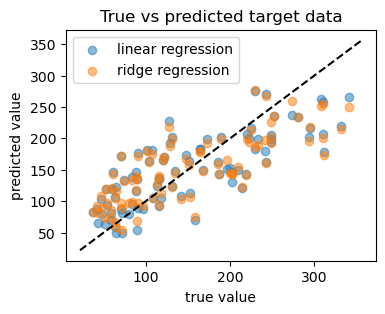

The R^2 score is 0.5984640169498225


In [22]:
# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeTest, alpha=0.5, label='ridge regression')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()
ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_RidgeTuned = r2_score(testTarget, y_ridgeTest)
print(f'The R^2 score is {r2_RidgeTuned}')

In [23]:
# Now let's try to find the best value of lambda.  This process is called hyperparameter tuning.

# Let's look at weights at different levels of lamba, and get the r2 score for each.
lambs = np.logspace(-5,0.2,50)
all_train_scores = []
all_val_scores = []

# Split our training data into a training and validation set.
np.random.seed(0)
indices = np.random.permutation(trainingData.shape[0])
splitIndex = int(trainingData.shape[0]*0.8)
training_inds, val_inds = indices[:splitIndex], indices[splitIndex:]
trainDat, valDat = trainingData[training_inds,:], trainingData[val_inds,:]
trainTarg, valTarg = trainingTarget[training_inds], trainingTarget[val_inds]
XTrain = np.hstack((trainDat, np.ones((trainDat.shape[0], 1))))
XVal = np.hstack((valDat, np.ones((valDat.shape[0], 1))))

for lamb in lambs:
    # Compute the weights using the ridge regression formula.
    w_ridge = np.linalg.inv(XTrain.T @ XTrain + lamb*np.eye(XTrain.shape[1])) @ XTrain.T @ trainTarg
    # Use the weights to predict the target data in training and testing sets.
    y_ridge_train = XTrain @ w_ridge
    y_ridge_val = XVal @ w_ridge
    # Now, let's compute the R^2 score to quantify the fit and store it.
    all_train_scores.append(r2_score(trainTarg, y_ridge_train))
    all_val_scores.append(r2_score(valTarg, y_ridge_val))

The best lambda is 0.009363292088239416


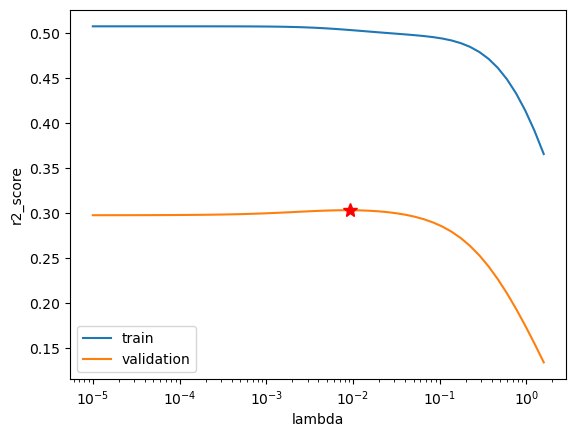

In [24]:
# Let's look at train and validation scores, and try to pick the best lambda.
f,ax = plt.subplots()
ax.plot(lambs, all_train_scores,label='train')
ax.plot(lambs, all_val_scores, label='validation')
ax.legend()
ax.set_xlabel('lambda')
ax.set_ylabel('r2_score')
ax.set_xscale('log')

# find the best lambda
best_lambda = lambs[np.argmax(all_val_scores)]
print(f'The best lambda is {best_lambda}')

# Add star to the plot denoting the best lambda
ax.plot(best_lambda, np.max(all_val_scores), 'r*', markersize=10)
plt.show()

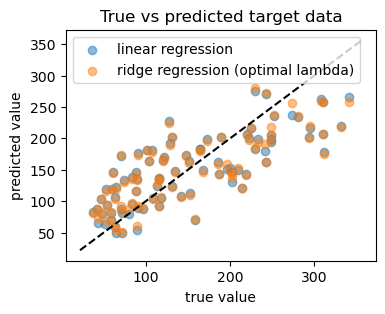

The R^2 score with optimized ridge regression is 0.6050279973402175


In [25]:
# Find the weights according to our derived expression using the ridge regression
w_ridge = np.linalg.inv(X_biasTrain.T @ X_biasTrain + best_lambda*np.eye(X_biasTrain.shape[1])) @ X_biasTrain.T @ trainingTarget
y_ridgeOpt = X_biasTest @ w_ridge

# Now, let's plot the true target data and the predicted target data for the Testing data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_biasPredict, alpha=0.5, label='linear regression')
ax.scatter(testTarget, y_ridgeOpt, alpha=0.5, label='ridge regression (optimal lambda)')
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.legend()

ax.set_title('True vs predicted target data')

#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_LinRegBias = r2_score(testTarget, y_ridgeOpt)
print(f'The R^2 score with optimized ridge regression is {r2_LinRegBias}')

### **3.D.4. Other regularization methods**

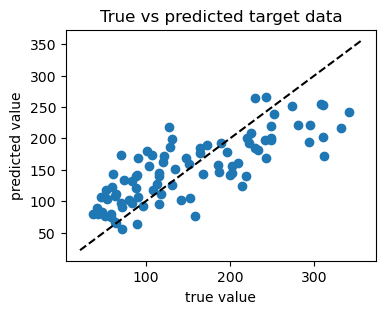

The R^2 score with lasso regression is 0.6007197232822948


In [26]:
# Other regularization methods
# Lasso regression (Least Absolute Shrinkage and Selection Operator or L1 regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_biasTrain, trainingTarget)
y_lasso = lasso.predict(X_biasTest)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_lasso)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_Lasso = r2_score(testTarget, y_lasso)
print(f'The R^2 score with lasso regression is {r2_Lasso}')

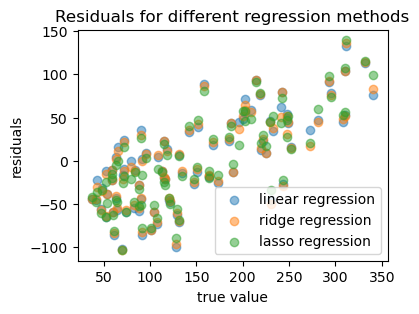

In [27]:
# Let's look at the residuals for each of the methods
# Linear regression
residuals_linear = testTarget - y_biasPredict
# Ridge regression
residuals_ridge = testTarget - y_ridgeOpt
# Lasso regression
residuals_lasso = testTarget - y_lasso

# Now, let's plot the residuals for each method
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, residuals_linear, alpha=0.5, label='linear regression')
ax.scatter(testTarget, residuals_ridge, alpha=0.5, label='ridge regression')
ax.scatter(testTarget, residuals_lasso, alpha=0.5, label='lasso regression')
ax.set_xlabel('true value'); ax.set_ylabel('residuals')
ax.legend()
ax.set_title('Residuals for different regression methods')
plt.show()


## 3.E. Linear Regression for Polynomial Features

The features used in the linear regression model above were all linear.  But what if we have a non-linear relationship between the features and the target variable?  One way to address this is to use polynomial features.  This is a simple way to add complexity to the model, and can be done by adding higher order terms of the features to the model.  For example, if we have a single feature $x$, we can add a quadratic term $x^2$ to the model, or a cubic term $x^3$, etc.  This can be done for multiple features as well. Let's see how this works in practice by doing a linear regression on a dataset with polynomial features.

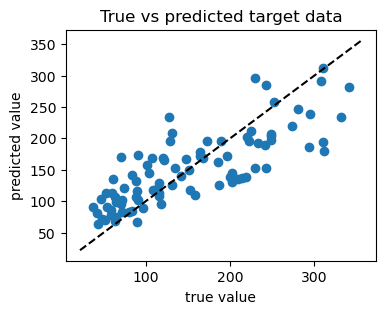

The R^2 score with optimized ridge regression (Poly2) is 0.6304666508603154


In [28]:
# Linear regression with polynomial features up to order 2
lambda_ = 0.001

X_biasTrainExtended = X_biasTrain
for i in range(numFeatures):
    for j in range(i, numFeatures):
        X_biasTrainExtended = np.hstack((X_biasTrainExtended, (X_biasTrain[:,i]*X_biasTrain[:,j]).reshape(-1,1)))
X_biasTestExtended = X_biasTest
for i in range(numFeatures):
    for j in range(i, numFeatures):
        X_biasTestExtended = np.hstack((X_biasTestExtended, (X_biasTest[:,i]*X_biasTest[:,j]).reshape(-1,1)))

# Find the weights using Ridge regression
w_ridge = np.linalg.inv(X_biasTrainExtended.T @ X_biasTrainExtended + lambda_*np.eye(X_biasTrainExtended.shape[1])) @ X_biasTrainExtended.T @ trainingTarget
y_ridgeOpt = X_biasTestExtended @ w_ridge

# Now, let's plot the true target data and the predicted target data for the Testing data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_ridgeOpt)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_LinRegPoly2 = r2_score(testTarget, y_ridgeOpt)
print(f'The R^2 score with optimized ridge regression (Poly2) is {r2_LinRegPoly2}')

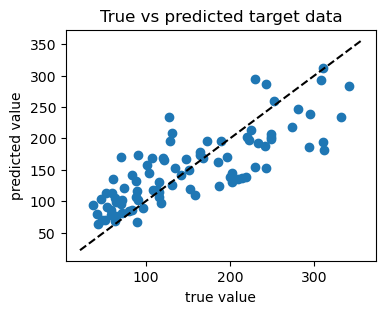

The R^2 score with optimized ridge regression (Poly3) is 0.630726036517781


In [29]:
# Linear Regression with Polynomial Features up to Order 3
lambda_ = 0.001

X_biasTrainExtended = X_biasTrain
for i in range(numFeatures):
    for j in range(i, numFeatures):
        X_biasTrainExtended = np.hstack((X_biasTrainExtended, (X_biasTrain[:,i]*X_biasTrain[:,j]).reshape(-1,1)))
for i in range(numFeatures):
    for j in range(i, numFeatures):
        for k in range(j, numFeatures):
            X_biasTrainExtended = np.hstack((X_biasTrainExtended, (X_biasTrain[:,i]*X_biasTrain[:,j]*X_biasTrain[:,k]).reshape(-1,1)))
X_biasTestExtended = X_biasTest
for i in range(numFeatures):
    for j in range(i, numFeatures):
        X_biasTestExtended = np.hstack((X_biasTestExtended, (X_biasTest[:,i]*X_biasTest[:,j]).reshape(-1,1)))
for i in range(numFeatures):
    for j in range(i, numFeatures):
        for k in range(j, numFeatures):
            X_biasTestExtended = np.hstack((X_biasTestExtended, (X_biasTest[:,i]*X_biasTest[:,j]*X_biasTest[:,k]).reshape(-1,1)))

# Find the weights using Ridge regression
w_ridge = np.linalg.inv(X_biasTrainExtended.T @ X_biasTrainExtended + lambda_*np.eye(X_biasTrainExtended.shape[1])) @ X_biasTrainExtended.T @ trainingTarget
y_ridgeOpt = X_biasTestExtended @ w_ridge

# Now, let's plot the true target data and the predicted target data for the Testing data.
f,ax = plt.subplots(figsize=(4,3))
ax.scatter(testTarget, y_ridgeOpt)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_LinRegPoly3 = r2_score(testTarget, y_ridgeOpt)
print(f'The R^2 score with optimized ridge regression (Poly3) is {r2_LinRegPoly3}')

# **4. Modern Machine Learning Tools for Regression**

Now that we have seen the basics of regression and know what are models and how to use them, let's play around with some more modern tools.  We don;t have time to cover the theory in detail, but many of the concepts are identical (e.g., features, targets, models, loss functions, regularization, hyperparameters, training/validation/testing). 

Python is one of the most popular platforms for machine learning, and the three main libraries used for machine learning are:

* [Tensorflow](https://www.tensorflow.org/)
* [PyTorch](https://pytorch.org/)
* [Sci-kit Learn](https://scikit-learn.org/stable/)

Tensorflow and Pytorch are the main packages for creating custom neural networks while Sci-kit learn focuses on providing common ML methods. Pytorch and Tensorflow (as of 2022) account for roughly 50% and 25% of new machine learning repositories in GitHub, respectively. Much digital ink has been spilled extolling the pros and cons of each framework; however, my personal best advice is to use whichever package has previous models for your particular problem uncovered by a literature search.

![tf_vs_pytorch](https://raw.githubusercontent.com/MunskyGroup/uqbio2021/main/module_2/figures/pytorch_vs_tensorflow.png)


For this notebook, we will be using pyTorch.

## **4.A. Neural Networks**
The technique of Neural Networks in Machine Learning can be thought of as as regression on steroids.  Instead of just one round of weights between the features and the targets, we introduce multiple sequential layers, where the outputs of each form the inputs to the next layer.  In addition, the functions are not just simple linear functions, but are replaced with other differentiable functions $f(x,\mathbf{w})$ at each stage.  

![alt text](FiguresD/images.005.png)

## **4.A.1. Python example of a Neural Network in PyTorch**

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm


In [31]:
# Reshape the target data to be a n_samples x 1 matrix. This is required by PyTorch.
trainingTarget = trainingTarget.reshape(-1, 1)
testTarget = testTarget.reshape(-1, 1)

# Convert the data to PyTorch tensors
XTrain = torch.from_numpy(X_biasTrain).float()
yTrain = torch.from_numpy(trainingTarget).float()
XTest = torch.from_numpy(X_biasTest).float()
yTest = torch.from_numpy(testTarget).float()

In [32]:
# Create a simple neural network model. This is a linear model with a single output. 
# It is equivalent to the linear regression model we used above.
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(X_biasTrain.shape[1], 1)
    def forward(self, x):
        return self.fc(x)
    
# Create the model, loss function, and optimizer
model = SimpleNN()
# Here we will use the MSE loss function (same as above) and the SGD optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create a DataLoader for the training data
trainData = TensorDataset(XTrain, yTrain)
trainLoader = DataLoader(trainData, batch_size=32, shuffle=True)

In [35]:
# Train the model, using the training data
epochs = 3000
losses = []
for epoch in tqdm(range(epochs)):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    # Print the loss every 100 epochs, to see how the training is going
    if epoch % 100 == 99:
        print(f'Epoch {epoch+1}, loss: {running_loss:.2f}')

# As you run this, you should see the loss decrease over time.

  4%|▍         | 129/3000 [00:00<00:17, 161.70it/s]

Epoch 100, loss: 38250.70


  8%|▊         | 230/3000 [00:01<00:17, 157.24it/s]

Epoch 200, loss: 34291.58


 11%|█         | 330/3000 [00:02<00:16, 161.75it/s]

Epoch 300, loss: 39550.19


 14%|█▍        | 434/3000 [00:02<00:16, 159.20it/s]

Epoch 400, loss: 41440.86


 17%|█▋        | 518/3000 [00:03<00:15, 161.13it/s]

Epoch 500, loss: 33973.04


 21%|██        | 621/3000 [00:04<00:14, 165.57it/s]

Epoch 600, loss: 35740.09


 24%|██▍       | 721/3000 [00:04<00:14, 156.32it/s]

Epoch 700, loss: 44019.95


 27%|██▋       | 824/3000 [00:05<00:13, 161.60it/s]

Epoch 800, loss: 34705.48


 31%|███       | 926/3000 [00:05<00:12, 161.30it/s]

Epoch 900, loss: 33274.90


 34%|███▍      | 1023/3000 [00:06<00:13, 149.24it/s]

Epoch 1000, loss: 32950.87


 37%|███▋      | 1123/3000 [00:07<00:11, 161.41it/s]

Epoch 1100, loss: 33369.16


 41%|████      | 1225/3000 [00:07<00:10, 164.33it/s]

Epoch 1200, loss: 32996.58


 44%|████▍     | 1325/3000 [00:08<00:10, 157.60it/s]

Epoch 1300, loss: 40738.65


 47%|████▋     | 1421/3000 [00:09<00:10, 152.91it/s]

Epoch 1400, loss: 34644.39


 51%|█████     | 1523/3000 [00:10<00:11, 133.85it/s]

Epoch 1500, loss: 33965.91


 54%|█████▍    | 1624/3000 [00:10<00:09, 143.12it/s]

Epoch 1600, loss: 32864.43


 58%|█████▊    | 1726/3000 [00:11<00:09, 140.67it/s]

Epoch 1700, loss: 33344.11


 61%|██████    | 1824/3000 [00:12<00:09, 120.27it/s]

Epoch 1800, loss: 33568.03


 64%|██████▍   | 1915/3000 [00:13<00:07, 145.28it/s]

Epoch 1900, loss: 33951.38


 67%|██████▋   | 2014/3000 [00:13<00:07, 133.83it/s]

Epoch 2000, loss: 32689.19


 71%|███████   | 2124/3000 [00:14<00:05, 151.15it/s]

Epoch 2100, loss: 32710.50


 74%|███████▍  | 2218/3000 [00:15<00:05, 142.46it/s]

Epoch 2200, loss: 34689.96


 77%|███████▋  | 2324/3000 [00:16<00:04, 141.51it/s]

Epoch 2300, loss: 34454.78


 81%|████████  | 2418/3000 [00:16<00:04, 120.52it/s]

Epoch 2400, loss: 33978.51


 84%|████████▍ | 2531/3000 [00:17<00:02, 159.64it/s]

Epoch 2500, loss: 33087.58


 87%|████████▋ | 2611/3000 [00:18<00:03, 127.32it/s]

Epoch 2600, loss: 37579.68


 91%|█████████ | 2722/3000 [00:18<00:01, 144.06it/s]

Epoch 2700, loss: 35350.66


 94%|█████████▍| 2814/3000 [00:19<00:01, 144.74it/s]

Epoch 2800, loss: 32884.92


 97%|█████████▋| 2920/3000 [00:20<00:00, 139.27it/s]

Epoch 2900, loss: 33514.60


100%|██████████| 3000/3000 [00:20<00:00, 143.47it/s]

Epoch 3000, loss: 34195.25


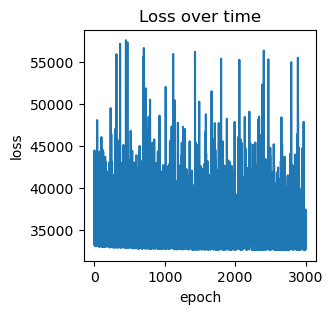

In [36]:
# Plot the loss over time, to see if the model is converging.
f,ax = plt.subplots(figsize=(3,3))
ax.plot(losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Loss over time')
plt.show()

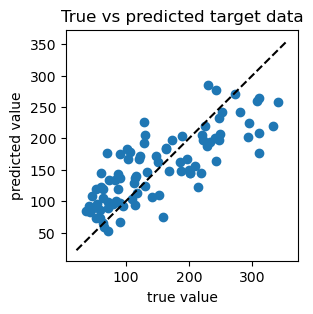

The R^2 score with neural network is 0.6060891387737317


In [37]:
# Use the model to predict the target data in the testing set
y_nn = model(XTest).detach().numpy()

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_nn)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_NN = r2_score(testTarget, y_nn)
print(f'The R^2 score with neural network is {r2_NN}')

In [38]:
# Now, let's try a more complex model, with a couple of hidden layers.
input_size = X_biasTrain.shape[1]
hidden_size = [10, 5]
output_size = 1

class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# This model consists of three fully connected layers, with 20, 10, and 1 neurons, respectively.
# The first two layers use the ReLU activation function, while the last layer does not use any activation function.
# See if you can figure out where these numbers are specified in the code above.
    
# Create the model, loss function, and optimizer
model = ComplexNN()
criterion = nn.MSELoss()
# Choose the optimizer and learning rate.  
# Here we will use the stochastic gradient descent (SGD) optimizer. This takes a learning rate as an argument, which controls 
# how quickly the model learns. A larger learning rate will make the model learn faster, but it may also make the model
# less stable. A smaller learning rate will make the model learn more slowly, but it may also make the model more stable.
# The learning rate is a hyperparameter that you can tune to improve the performance of your model.
optimizer = optim.SGD(model.parameters(), lr=0.00001)


In [39]:
from IPython.display import clear_output
# Train the model, using the training data
epochs = 10000
losses = []
for epoch in tqdm(range(epochs)):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    # Print the loss every 100 epochs, to see how the training is going.
    # Delete the output of the print statement each time you run this, to keep the output clean.
    if epoch % 100 == 0:
        # clear_output(wait=True)
        print(f'Epoch {epoch+1}, loss: {running_loss:.2f}\r\r')
        
# As you run this, you should see the loss decrease over time.
# Run it multiple times to see how the loss changes.
# Try different learning rates and numbers of epochs to see how the loss changes.
# Try different numbers of hidden layers and neurons to see how the loss changes.

  0%|          | 22/10000 [00:00<01:33, 106.25it/s]

Epoch 1, loss: 320234.63


  1%|          | 116/10000 [00:01<01:45, 94.08it/s]

Epoch 101, loss: 64330.51


  2%|▏         | 211/10000 [00:02<01:36, 101.33it/s]

Epoch 201, loss: 65859.23


  3%|▎         | 314/10000 [00:03<01:48, 89.58it/s] 

Epoch 301, loss: 52654.84


  4%|▍         | 420/10000 [00:04<01:22, 116.62it/s]

Epoch 401, loss: 41112.66


  5%|▌         | 513/10000 [00:04<01:28, 107.45it/s]

Epoch 501, loss: 36275.92


  6%|▌         | 619/10000 [00:06<01:27, 106.76it/s]

Epoch 601, loss: 36389.72


  7%|▋         | 712/10000 [00:06<01:29, 104.12it/s]

Epoch 701, loss: 48003.58


  8%|▊         | 818/10000 [00:07<01:26, 105.67it/s]

Epoch 801, loss: 40563.65


  9%|▉         | 917/10000 [00:08<01:31, 99.61it/s] 

Epoch 901, loss: 39225.36


 10%|█         | 1017/10000 [00:09<01:20, 110.98it/s]

Epoch 1001, loss: 36507.25


 11%|█         | 1123/10000 [00:10<01:23, 106.47it/s]

Epoch 1101, loss: 32862.16


 12%|█▏        | 1216/10000 [00:11<01:18, 112.05it/s]

Epoch 1201, loss: 37403.05


 13%|█▎        | 1323/10000 [00:12<01:15, 114.67it/s]

Epoch 1301, loss: 33582.67


 14%|█▍        | 1412/10000 [00:13<01:31, 94.35it/s] 

Epoch 1401, loss: 32691.85


 15%|█▌        | 1525/10000 [00:14<01:13, 114.68it/s]

Epoch 1501, loss: 32909.89


 16%|█▌        | 1614/10000 [00:15<01:27, 96.21it/s] 

Epoch 1601, loss: 33384.79


 17%|█▋        | 1708/10000 [00:16<01:14, 112.01it/s]

Epoch 1701, loss: 40685.70


 18%|█▊        | 1819/10000 [00:17<01:24, 96.89it/s] 

Epoch 1801, loss: 35215.66


 19%|█▉        | 1919/10000 [00:18<01:19, 101.28it/s]

Epoch 1901, loss: 33744.12


 20%|██        | 2015/10000 [00:19<01:21, 98.18it/s] 

Epoch 2001, loss: 38281.44


 21%|██        | 2117/10000 [00:20<01:15, 105.11it/s]

Epoch 2101, loss: 37908.30


 22%|██▏       | 2217/10000 [00:21<01:02, 125.02it/s]

Epoch 2201, loss: 32845.20


 23%|██▎       | 2317/10000 [00:22<01:17, 99.77it/s] 

Epoch 2301, loss: 35511.04


 24%|██▍       | 2419/10000 [00:23<01:12, 104.07it/s]

Epoch 2401, loss: 37057.39


 25%|██▌       | 2515/10000 [00:24<01:07, 110.19it/s]

Epoch 2501, loss: 35466.88


 26%|██▌       | 2618/10000 [00:25<01:08, 108.07it/s]

Epoch 2601, loss: 36739.60


 27%|██▋       | 2724/10000 [00:26<01:04, 113.32it/s]

Epoch 2701, loss: 33745.99


 28%|██▊       | 2817/10000 [00:27<00:55, 128.83it/s]

Epoch 2801, loss: 37297.87


 29%|██▉       | 2915/10000 [00:28<00:53, 131.67it/s]

Epoch 2901, loss: 32888.72


 30%|███       | 3027/10000 [00:29<00:52, 131.83it/s]

Epoch 3001, loss: 33025.69


 31%|███       | 3123/10000 [00:29<00:53, 127.89it/s]

Epoch 3101, loss: 40983.06


 32%|███▏      | 3221/10000 [00:30<00:50, 132.94it/s]

Epoch 3201, loss: 34967.55


 33%|███▎      | 3319/10000 [00:31<00:50, 132.97it/s]

Epoch 3301, loss: 37340.22


 34%|███▍      | 3417/10000 [00:32<00:49, 132.24it/s]

Epoch 3401, loss: 35285.88


 35%|███▌      | 3515/10000 [00:32<00:50, 128.99it/s]

Epoch 3501, loss: 36249.52


 36%|███▋      | 3627/10000 [00:33<00:47, 133.09it/s]

Epoch 3601, loss: 34852.16


 37%|███▋      | 3725/10000 [00:34<00:47, 132.61it/s]

Epoch 3701, loss: 34860.77


 38%|███▊      | 3823/10000 [00:35<00:49, 125.60it/s]

Epoch 3801, loss: 32816.87


 39%|███▉      | 3921/10000 [00:35<00:46, 131.79it/s]

Epoch 3901, loss: 35298.18


 40%|████      | 4014/10000 [00:36<00:47, 126.52it/s]

Epoch 4001, loss: 32917.06


 41%|████      | 4119/10000 [00:37<00:46, 127.43it/s]

Epoch 4101, loss: 35128.27


 42%|████▏     | 4217/10000 [00:38<00:47, 121.44it/s]

Epoch 4201, loss: 39742.63


 43%|████▎     | 4315/10000 [00:39<00:42, 132.84it/s]

Epoch 4301, loss: 34826.93


 44%|████▍     | 4427/10000 [00:39<00:41, 133.99it/s]

Epoch 4401, loss: 34303.98


 45%|████▌     | 4525/10000 [00:40<00:40, 133.84it/s]

Epoch 4501, loss: 32922.31


 46%|████▌     | 4609/10000 [00:41<00:41, 130.52it/s]

Epoch 4601, loss: 32693.26


 47%|████▋     | 4714/10000 [00:42<00:41, 126.35it/s]

Epoch 4701, loss: 33088.00


 48%|████▊     | 4825/10000 [00:43<00:40, 127.77it/s]

Epoch 4801, loss: 33265.38


 49%|████▉     | 4921/10000 [00:43<00:40, 126.69it/s]

Epoch 4901, loss: 32823.86


 50%|█████     | 5019/10000 [00:44<00:41, 118.96it/s]

Epoch 5001, loss: 34924.36


 51%|█████     | 5115/10000 [00:45<00:37, 131.57it/s]

Epoch 5101, loss: 34772.74


 52%|█████▏    | 5227/10000 [00:46<00:35, 134.58it/s]

Epoch 5201, loss: 34600.90


 53%|█████▎    | 5311/10000 [00:46<00:35, 133.25it/s]

Epoch 5301, loss: 33698.15


 54%|█████▍    | 5420/10000 [00:48<00:46, 97.96it/s] 

Epoch 5401, loss: 36223.00


 55%|█████▌    | 5516/10000 [00:49<00:44, 99.69it/s]

Epoch 5501, loss: 33956.60


 56%|█████▌    | 5614/10000 [00:50<00:42, 102.38it/s]

Epoch 5601, loss: 34009.24


 57%|█████▋    | 5713/10000 [00:51<00:42, 101.87it/s]

Epoch 5701, loss: 36540.84


 58%|█████▊    | 5821/10000 [00:52<00:34, 121.18it/s]

Epoch 5801, loss: 34466.46


 59%|█████▉    | 5923/10000 [00:53<00:34, 117.51it/s]

Epoch 5901, loss: 33604.85


 60%|██████    | 6025/10000 [00:53<00:31, 125.07it/s]

Epoch 6001, loss: 34408.38


 61%|██████    | 6115/10000 [00:54<00:31, 123.74it/s]

Epoch 6101, loss: 33351.26


 62%|██████▏   | 6218/10000 [00:55<00:30, 123.66it/s]

Epoch 6201, loss: 34150.99


 63%|██████▎   | 6322/10000 [00:56<00:29, 124.48it/s]

Epoch 6301, loss: 34088.98


 64%|██████▍   | 6415/10000 [00:57<00:29, 123.07it/s]

Epoch 6401, loss: 33493.96


 65%|██████▌   | 6520/10000 [00:58<00:27, 127.43it/s]

Epoch 6501, loss: 34768.75


 66%|██████▌   | 6611/10000 [00:58<00:30, 109.81it/s]

Epoch 6601, loss: 40069.53


 67%|██████▋   | 6725/10000 [00:59<00:25, 126.00it/s]

Epoch 6701, loss: 37143.47


 68%|██████▊   | 6816/10000 [01:00<00:25, 126.86it/s]

Epoch 6801, loss: 34526.85


 69%|██████▉   | 6922/10000 [01:01<00:24, 124.89it/s]

Epoch 6901, loss: 35662.58


 70%|███████   | 7015/10000 [01:02<00:23, 126.68it/s]

Epoch 7001, loss: 40872.75


 71%|███████   | 7119/10000 [01:03<00:27, 106.12it/s]

Epoch 7101, loss: 52234.14


 72%|███████▏  | 7224/10000 [01:03<00:22, 126.13it/s]

Epoch 7201, loss: 36924.52


 73%|███████▎  | 7318/10000 [01:04<00:20, 129.07it/s]

Epoch 7301, loss: 54038.62


 74%|███████▍  | 7423/10000 [01:05<00:21, 119.57it/s]

Epoch 7401, loss: 33744.84


 75%|███████▌  | 7514/10000 [01:06<00:24, 103.03it/s]

Epoch 7501, loss: 33171.82


 76%|███████▋  | 7625/10000 [01:07<00:20, 115.69it/s]

Epoch 7601, loss: 33467.05


 77%|███████▋  | 7715/10000 [01:08<00:18, 124.03it/s]

Epoch 7701, loss: 33260.25


 78%|███████▊  | 7820/10000 [01:09<00:16, 128.25it/s]

Epoch 7801, loss: 32511.64


 79%|███████▉  | 7924/10000 [01:09<00:16, 125.77it/s]

Epoch 7901, loss: 32556.31


 80%|████████  | 8016/10000 [01:10<00:15, 125.77it/s]

Epoch 8001, loss: 32619.67


 81%|████████  | 8114/10000 [01:11<00:19, 97.15it/s] 

Epoch 8101, loss: 42380.06


 82%|████████▏ | 8225/10000 [01:12<00:14, 122.08it/s]

Epoch 8201, loss: 32874.27


 83%|████████▎ | 8314/10000 [01:13<00:13, 124.29it/s]

Epoch 8301, loss: 34925.15


 84%|████████▍ | 8417/10000 [01:14<00:12, 122.54it/s]

Epoch 8401, loss: 32586.25


 85%|████████▌ | 8521/10000 [01:15<00:12, 122.24it/s]

Epoch 8501, loss: 34605.22


 86%|████████▌ | 8617/10000 [01:16<00:13, 104.26it/s]

Epoch 8601, loss: 41377.32


 87%|████████▋ | 8717/10000 [01:16<00:12, 103.50it/s]

Epoch 8701, loss: 33488.67


 88%|████████▊ | 8827/10000 [01:17<00:09, 120.90it/s]

Epoch 8801, loss: 34027.13


 89%|████████▉ | 8917/10000 [01:18<00:09, 116.10it/s]

Epoch 8901, loss: 33740.50


 90%|█████████ | 9007/10000 [01:19<00:07, 124.98it/s]

Epoch 9001, loss: 36603.05


 91%|█████████ | 9123/10000 [01:20<00:07, 125.13it/s]

Epoch 9101, loss: 33021.97


 92%|█████████▏| 9215/10000 [01:21<00:06, 126.22it/s]

Epoch 9201, loss: 34333.32


 93%|█████████▎| 9320/10000 [01:22<00:05, 123.40it/s]

Epoch 9301, loss: 32682.25


 94%|█████████▍| 9424/10000 [01:22<00:04, 124.60it/s]

Epoch 9401, loss: 34738.43


 95%|█████████▌| 9515/10000 [01:23<00:04, 109.56it/s]

Epoch 9501, loss: 36844.82


 96%|█████████▌| 9618/10000 [01:24<00:03, 123.77it/s]

Epoch 9601, loss: 35915.58


 97%|█████████▋| 9722/10000 [01:25<00:02, 125.78it/s]

Epoch 9701, loss: 34523.44


 98%|█████████▊| 9812/10000 [01:26<00:01, 122.50it/s]

Epoch 9801, loss: 36102.83


 99%|█████████▉| 9915/10000 [01:27<00:00, 121.01it/s]

Epoch 9901, loss: 33754.81


100%|██████████| 10000/10000 [01:27<00:00, 113.67it/s]


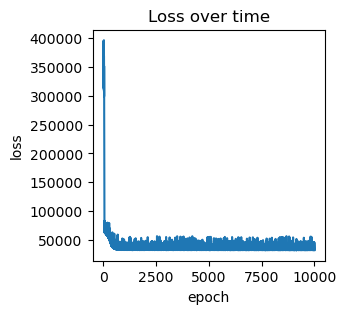

In [40]:
# Plot the loss over time, to see if the model is converging.
f,ax = plt.subplots(figsize=(3,3))
ax.plot(losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Loss over time')
plt.show()

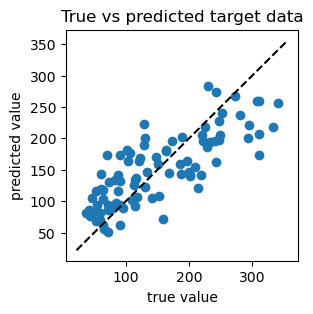

The R^2 score with larger neural network is 0.6094087267406745


In [41]:
# Use the model to predict the target data in the testing set
y_nn = model(XTest).detach().numpy()

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_nn)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_NNComplex = r2_score(testTarget, y_nn)
print(f'The R^2 score with larger neural network is {r2_NNComplex}')

## **4.B. Decision Trees and Random Forests**

**Decision Trees** are a type of model that makes decisions based on a series of if-then-else statements. For example, a decision tree might ask if a patient has a fever, and if they do, it might ask if they have a cough, and so on.  The final decision is made based on the answers to these questions.

**Random Forests** are a type of ensemble learning method, where multiple decision trees are trained on different subsets of the data and then combined to make a final prediction. This can help to reduce overfitting and improve the accuracy of the model.

## **4.B.1. Python example of a Random Forest in Sci-kit Learn**

/Users/munsky/anaconda3/envs/BIOM480A5/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


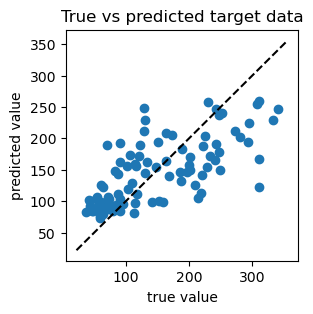

The R^2 score with random forest is 0.4630379539733208


In [42]:
# Regression using Random Forest in scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf = RandomForestRegressor(n_estimators=100)

# Train the model
rf.fit(X_biasTrain, trainingTarget)

# Use the model to predict the target data in the testing set
y_rf = rf.predict(X_biasTest)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_rf)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_RF = r2_score(testTarget, y_rf)
print(f'The R^2 score with random forest is {r2_RF}')

## 4.C. Bayesian Regression

Bayesian regression is a type of regression analysis that uses Bayesian statistics to estimate the parameters of a regression model. In Bayesian regression, we start with a prior distribution for the parameters of the model, and then update this distribution based on the observed data to get a posterior distribution for the parameters. This allows us to quantify the uncertainty in our estimates and make probabilistic predictions.

## **4.C.1. Python example of Bayesian Regression in PyMC3**

/Users/munsky/anaconda3/envs/BIOM480A5/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


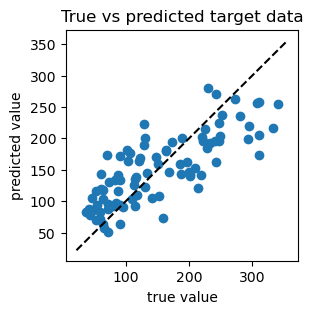

The R^2 score with Bayesian regression is 0.6052505898276096


In [43]:
# Bayesian regression
from sklearn.linear_model import BayesianRidge
# Create the model
bayesian = BayesianRidge()

# Train the model
bayesian.fit(X_biasTrain, trainingTarget)

# Use the model to predict the target data in the testing set
y_bayesian = bayesian.predict(X_biasTest)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_bayesian)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_Bayesian = r2_score(testTarget, y_bayesian)
print(f'The R^2 score with Bayesian regression is {r2_Bayesian}')

/Users/munsky/anaconda3/envs/BIOM480A5/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


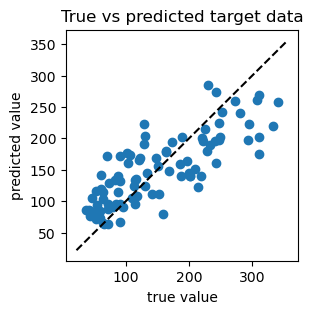

The R^2 score with Bayesian regression (Poly3) is 0.6146065781197212


In [44]:
# Bayesian regression with polynomial features up to order 3
# Create the model
bayesian = BayesianRidge()

# Train the model
bayesian.fit(X_biasTrainExtended, trainingTarget)

# Use the model to predict the target data in the testing set
y_bayesian = bayesian.predict(X_biasTestExtended)

# Now, let's plot the true target data and the predicted target data.
f,ax = plt.subplots(figsize=(3,3))
ax.scatter(testTarget, y_bayesian)
ax.set_xlabel('true value'); ax.set_ylabel('predicted value')
ax.set_title('True vs predicted target data')
#Put a line through the origin with slope 1
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
plt.show()

# Now, let's compute the R^2 score to quantify the fit.
r2_BayesianPoly3 = r2_score(testTarget, y_bayesian)

print(f'The R^2 score with Bayesian regression (Poly3) is {r2_BayesianPoly3}')


# **5. Summary**

In this notebook, we have covered the basics of regression, including linear regression, regularization, and modern machine learning tools. We have seen how to fit a linear regression model to data, how to evaluate the model using the R^2 score, and how to account for model bias and overfitting using regularization. We have also seen how to use modern machine learning tools like neural networks, decision trees, random forests, and Bayesian regression to solve regression problems.

Let's summarize the key points we have covered:

* **Regression** is a type of machine learning that is used to predict a continuous target variable based on one or more input features.
* **Linear regression** is a simple regression model that assumes a linear relationship between the input features and the target variable.
* **Linear regression with polynomial features** is a way to add complexity to the model by including higher order terms of the features.
* **Regularization** is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function.
* **Neural networks** are a type of machine learning model that uses multiple layers of interconnected nodes to learn complex patterns in the data.
* **Decision trees** are a type of model that makes decisions based on a series of if-then-else statements.
* **Random forests** are an ensemble learning method that combines multiple decision trees to make a final prediction.

Also, let's summarize the performance of the models we have used:

In [45]:
# Make a table of the model performance
import pandas as pd
data = {'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Linear Regression (Poly2)', 'Linear Regression (Poly3)', 'Neural Network', 'Neural Network (Complex)', 'Random Forest', 'Bayesian Regression', 'Bayesian Regression (Poly3)'],
        'R^2 Score': [r2_LinRegBias, r2_RidgeTuned, r2_Lasso, r2_LinRegPoly2, r2_LinRegPoly3, r2_NN, r2_NNComplex, r2_RF, r2_Bayesian, r2_BayesianPoly3]}
df = pd.DataFrame(data)
print(df)

                         Model  R^2 Score
0            Linear Regression   0.605028
1             Ridge Regression   0.598464
2             Lasso Regression   0.600720
3    Linear Regression (Poly2)   0.630467
4    Linear Regression (Poly3)   0.630726
5               Neural Network   0.606089
6     Neural Network (Complex)   0.609409
7                Random Forest   0.463038
8          Bayesian Regression   0.605251
9  Bayesian Regression (Poly3)   0.614607
